# LV8

## Base model - the one created in the previous lab excercise

In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical

# Function for loading and preprocessing data
def load_and_preprocess_data():
  # Load data
  (trainX, trainy), (testX, testy) = cifar10.load_data()

  # Prepare data for the training
  trainX = trainX.astype('float32') / 255
  testX = testX.astype('float32') / 255

  trainy = to_categorical(trainy)
  testy = to_categorical(testy)

  # Return data
  return trainX, trainy, testX, testy

In [2]:
import matplotlib.pyplot as plt

# Function for plotting the behavior of accuracy and loss over the epochs
def summarize_diagnostics(history):
	# Plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# Plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.show()
	plt.close()

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import SGD

# Function for defining the base model
def define_base_model():
  model = Sequential()
  # Convolutional block 1.
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  # Convolutional block 2.
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  # Convolutional block 3.
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  # Fully connected layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))

  # Compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.1248 - loss: 2.2769 - val_accuracy: 0.2732 - val_loss: 2.0159
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2563 - loss: 2.0238 - val_accuracy: 0.3204 - val_loss: 1.9061
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3120 - loss: 1.9032 - val_accuracy: 0.3931 - val_loss: 1.7066
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3717 - loss: 1.7302 - val_accuracy: 0.4277 - val_loss: 1.5852
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4139 - loss: 1.6142 - val_accuracy: 0.4642 - val_loss: 1.4762
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4458 - loss: 1.5245 - val_accuracy: 0.4977 - val_loss: 1.3916
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4754 - loss: 1.4394 - val_accuracy: 0.5320 - val_loss: 1.3014
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5103 - loss: 1.3662 - val_accurac

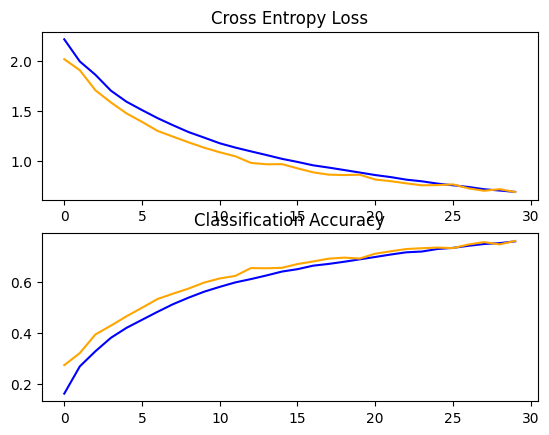

In [ ]:
# Preprocess data
trainX, trainy, testX, testy = load_and_preprocess_data()

# Define base model
base_model = define_base_model()

# Show model summary
base_model.summary()

# Train model
base_model_history = base_model.fit(trainX, trainy, epochs=30, validation_data=(testX, testy), batch_size=64)

# Evaluate model
base_model_test_loss, base_model_test_acc = base_model.evaluate(testX, testy, verbose=0)
print(f"Achieved accuracy on test dataset: {base_model_test_acc * 100.0}%")

# Plot accuracy and loss
summarize_diagnostics(base_model_history)

###Base model accuracy on test dataset: ~ 73% - 76%

---



## Adding Batch Normalization

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import SGD

# Function for defining base model with batch normalization
def define_bn_model():
  model = Sequential()
  # Convolutional block 1.
  model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same')) # Remove activation function
  model.add(layers.BatchNormalization()) # Add batch normalization
  model.add(layers.Activation('relu')) # Add activation function
  model.add(layers.Conv2D(32, (3, 3), padding='same')) # Remove activation function
  model.add(layers.BatchNormalization()) # Add batch normalization
  model.add(layers.Activation('relu')) # Add activation function
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  # Convolutional block 2.
  model.add(layers.Conv2D(64, (3, 3), padding='same')) # Remove activation function
  model.add(layers.BatchNormalization()) # Add batch normalization
  model.add(layers.Activation('relu')) # Add activation function
  model.add(layers.Conv2D(64, (3, 3), padding='same')) # Remove activation function
  model.add(layers.BatchNormalization()) # Add batch normalization
  model.add(layers.Activation('relu')) # Add activation function
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  # Convolutional block 3.
  model.add(layers.Conv2D(128, (3, 3), padding='same')) # Remove activation function
  model.add(layers.BatchNormalization()) # Add batch normalization
  model.add(layers.Activation('relu')) # Add activation function
  model.add(layers.Conv2D(128, (3, 3), padding='same')) # Remove activation function
  model.add(layers.BatchNormalization()) # Add batch normalization
  model.add(layers.Activation('relu')) # Add activation function
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  # Fully connected layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128)) # Remove activation function
  model.add(layers.BatchNormalization()) # Add batch normalization
  model.add(layers.Activation('relu')) # Add activation function
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))

  # Compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 8, 8, 128)           │              

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.2945 - loss: 1.9995 - val_accuracy: 0.3979 - val_loss: 1.6949
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4724 - loss: 1.4387 - val_accuracy: 0.5016 - val_loss: 1.3929
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5348 - loss: 1.2864 - val_accuracy: 0.5422 - val_loss: 1.2912
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5795 - loss: 1.1796 - val_accuracy: 0.4321 - val_loss: 1.6807
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6167 - loss: 1.0739 - val_accuracy: 0.5068 - val_loss: 1.3864
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6405 - loss: 1.0118 - val_accuracy: 0.5819 - val_loss: 1.2143
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6642 - loss: 0.9504 - val_accuracy: 0.6459 - val_loss: 0.9825
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6798 - loss: 0.9017 - val_accura

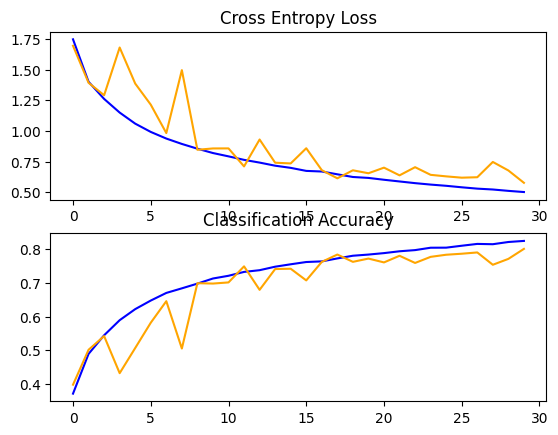

In [ ]:
# Preprocess data
trainX, trainy, testX, testy = load_and_preprocess_data()

# Define base model with batch normalization
bn_model = define_bn_model()

# Show model summary
bn_model.summary()

# Train model
bn_model_history = bn_model.fit(trainX, trainy, epochs=30, validation_data=(testX, testy), batch_size=64)

# Evaluate model
bn_model_test_loss, bn_model_test_acc = bn_model.evaluate(testX, testy, verbose=0)
print(f"Achieved accuracy on test dataset: {bn_model_test_acc * 100.0}%")

# Plot accuracy and loss
summarize_diagnostics(bn_model_history)

Although overall accuracy on test dataset is higher, we can observe instability in validation accuracy. This is a common issue that can arise due to interactions between Batch Normalization and other training setup (optimizer, lr, regularization). There are several ways to stabilize our model while retaining the accuracy. The easiest solution is to reduce the momentum in the batch normalization, while keeping our base architecture the same. Let's slightly modify our bn_define_model() function.







In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import SGD

def define_bn_model_v2():
  model = Sequential()
  # Convolutional block 1.
  model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same'))
  model.add(layers.BatchNormalization(momentum=0.8)) # Set momentum to 0.8
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(32, (3, 3), padding='same'))
  model.add(layers.BatchNormalization(momentum=0.8)) # Set momentum to 0.8
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  # Convolutional block 2.
  model.add(layers.Conv2D(64, (3, 3), padding='same'))
  model.add(layers.BatchNormalization(momentum=0.8)) # Set momentum to 0.8
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same'))
  model.add(layers.BatchNormalization(momentum=0.8)) # Set momentum to 0.8
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  # Convolutional block 3.
  model.add(layers.Conv2D(128, (3, 3), padding='same'))
  model.add(layers.BatchNormalization(momentum=0.8)) # Set momentum to 0.8
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(128, (3, 3), padding='same'))
  model.add(layers.BatchNormalization(momentum=0.8)) # Set momentum to 0.8
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  # Fully connected layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128))
  model.add(layers.BatchNormalization(momentum=0.8)) # Set momentum to 0.8
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))

  # Compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 8, 8, 128)           │              

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.2899 - loss: 1.9946 - val_accuracy: 0.4319 - val_loss: 1.6270
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4903 - loss: 1.4077 - val_accuracy: 0.5157 - val_loss: 1.3507
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5557 - loss: 1.2369 - val_accuracy: 0.5924 - val_loss: 1.1155
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6022 - loss: 1.1040 - val_accuracy: 0.6384 - val_loss: 1.0163
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6408 - loss: 1.0059 - val_accuracy: 0.6457 - val_loss: 0.9928
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6683 - loss: 0.9398 - val_accuracy: 0.6997 - val_loss: 0.8474
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6845 - loss: 0.8886 - val_accuracy: 0.6874 - val_loss: 0.8751
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6998 - loss: 0.8539 - val_accuracy:

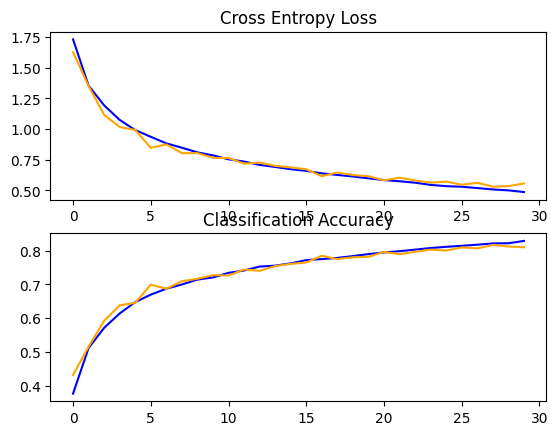

In [ ]:
# Preprocess data
trainX, trainy, testX, testy = load_and_preprocess_data()

# Define base model with batch normalization (momentum=0.8)
bn_model_v2 = define_bn_model_v2()

# Show model summary
bn_model_v2.summary()

# Train model
bn_model_v2_history = bn_model_v2.fit(trainX, trainy, epochs=30, validation_data=(testX, testy), batch_size=64)

# Evaluate model
bn_model_v2_test_loss, bn_model_v2_test_acc = bn_model_v2.evaluate(testX, testy, verbose=0)
print(f"Achieved accuracy on test dataset: {bn_model_v2_test_acc * 100.0}%")

# Plot accuracy and loss
summarize_diagnostics(bn_model_v2_history)

###Base model + batch normalization - accuracy on test dataset: ~ 80% - 82%

## Adding Weight Decay

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import SGD
from keras.regularizers import l2


def define_bn_wd_model():
  model = Sequential()
  # Convolutional block 1.
  model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', kernel_regularizer=l2(0.001))) # Add L2 regularization with 0.001 regularization factor
  model.add(layers.BatchNormalization(momentum=0.8))
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.001))) # Add L2 regularization with 0.001 regularization factor
  model.add(layers.BatchNormalization(momentum=0.8))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  # Convolutional block 2.
  model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001))) # Add L2 regularization with 0.001 regularization factor
  model.add(layers.BatchNormalization(momentum=0.8))
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001))) # Add L2 regularization with 0.001 regularization factor
  model.add(layers.BatchNormalization(momentum=0.8))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  # Convolutional block 3.
  model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.001))) # Add L2 regularization with 0.001 regularization factor
  model.add(layers.BatchNormalization(momentum=0.8))
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.001))) # Add L2 regularization with 0.001 regularization factor
  model.add(layers.BatchNormalization(momentum=0.8))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  # Fully connected layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128, kernel_regularizer=l2(0.001))) # Add L2 regularization with 0.001 regularization factor
  model.add(layers.BatchNormalization(momentum=0.8))
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='softmax'))

  # Compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_35 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_36 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_37 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_38 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_39 (Activation)           │ (None, 8, 8, 128)           │              

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.2967 - loss: 2.5720 - val_accuracy: 0.4739 - val_loss: 2.0304
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4813 - loss: 1.9846 - val_accuracy: 0.5201 - val_loss: 1.8927
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5528 - loss: 1.8022 - val_accuracy: 0.5418 - val_loss: 1.8397
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6007 - loss: 1.6624 - val_accuracy: 0.5542 - val_loss: 1.7805
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6337 - loss: 1.5592 - val_accuracy: 0.6501 - val_loss: 1.4871
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6643 - loss: 1.4672 - val_accuracy: 0.6769 - val_loss: 1.4181
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6776 - loss: 1.4124 - val_accuracy: 0.6589 - val_loss: 1.4587
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6958 - loss: 1.3488 - val_accur

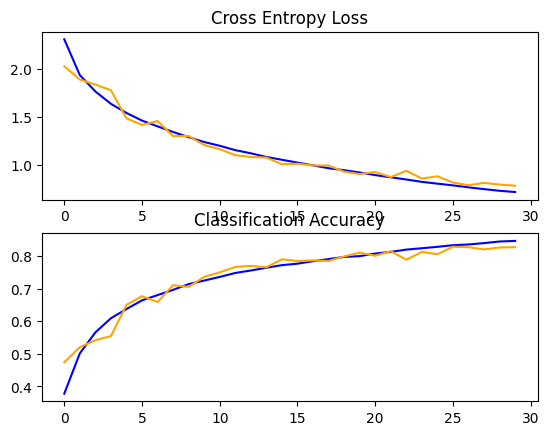

In [ ]:
# Preprocess data
trainX, trainy, testX, testy = load_and_preprocess_data()

# Define base model with batch normalization (momentum=0.8) and weight decay
bn_wd_model = define_bn_wd_model()

# Show model summary
bn_wd_model.summary()

# Train model
bn_wd_model_history = bn_wd_model.fit(trainX, trainy, epochs=30, validation_data=(testX, testy), batch_size=64)

# Evaluate model
bn_wd_model_test_loss, bn_wd_model_test_acc = bn_wd_model.evaluate(testX, testy, verbose=0)
print(f"Achieved accuracy on test dataset: {bn_wd_model_test_acc * 100.0}%")

# Plot accuracy and loss
summarize_diagnostics(bn_wd_model_history)

###Base model + batch normalization + weight decay - accuracy on test dataset: ~ 83% - 85%

##Transfer Learning

## Transfer Learning with VGG

### Transfer learning without fine-tuning



In [4]:
from keras import layers, models
from keras.applications import VGG16
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.models import Sequential


def define_vgg_model():

  # Load the VGG16 model which is pre-trained on ImageNet data and exclude top layer
  vgg_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

  # Freeze the VGG16 model layers to prevent training them
  vgg_base_model.trainable = False

  # Build TF model
  model = Sequential()

  # Add the base VGG16 model
  model.add(vgg_base_model)

  # Add custom layers on top of VGG16 base model
  model.add(layers.Flatten())
  model.add(layers.Dense(256, kernel_regularizer=l2(0.001)))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))

  # Compile model
  opt = SGD(learning_rate=0.0001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_42 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,849,610 (56.65 MB)

 Trainable params: 134,410 (525.04 KB)

 Non-trainable params: 14,715,200 (56.13 MB)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.1485 - loss: 3.1246 - val_accuracy: 0.3541 - val_loss: 2.1834
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.2842 - loss: 2.4536 - val_accuracy: 0.4198 - val_loss: 2.0112
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3390 - loss: 2.2731 - val_accuracy: 0.4483 - val_loss: 1.9276
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3704 - loss: 2.1759 - val_accuracy: 0.4653 - val_loss: 1.8751
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3938 - loss: 2.1037 - val_accuracy: 0.4769 - val_loss: 1.8367
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4067 - loss: 2.0622 - val_accuracy: 0.4876 - val_loss: 1.8075
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4187 - loss: 2.0128 - val_accuracy: 0.4953 - val_loss: 1.7837
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4268 - loss: 1.9827 - va

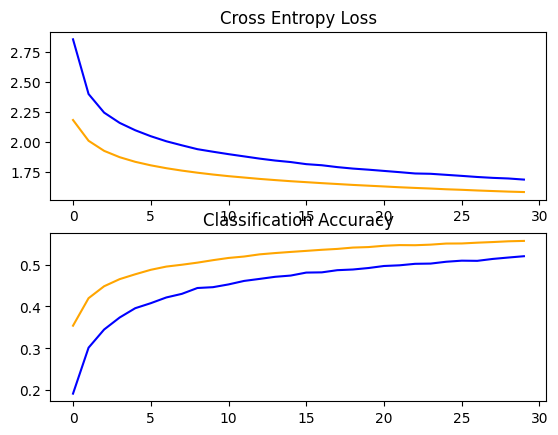

In [ ]:
# Preprocess data
trainX, trainy, testX, testy = load_and_preprocess_data()

# Define VGG model
vgg_model = define_vgg_model()

# Show model summary
vgg_model.summary()

# Train model
vgg_model_history = vgg_model.fit(trainX, trainy, epochs=30, validation_data=(testX, testy), batch_size=64)

# Evaluate model
vgg_model_test_loss, vgg_model_test_acc = vgg_model.evaluate(testX, testy, verbose=0)
print(f"Achieved accuracy on test dataset: {vgg_model_test_acc * 100.0}%")

# Plot accuracy and loss
summarize_diagnostics(vgg_model_history)

###Transfer learning using VGG16 without fine-tuning - accuracy on test dataset: ~ 55% - 57%

###Transfer learning using VGG16 and fine-tuning last three layers




In [29]:
from keras import layers, models
from keras.applications import VGG16
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.models import Sequential



def define_vgg_model_v2():

  # Load the VGG16 model which is pre-trained on ImageNet data and exclude top layer
  vgg_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

  # Freeze the VGG16 model layers to prevent training them
  vgg_base_model.trainable = True

  # Unfreeze the last 3 layers of the vgg model
  for layer in vgg_base_model.layers[:-3]:
    layer.trainable = False

  # Build TF model
  model = Sequential()

  # Add the base VGG16 model
  model.add(vgg_base_model)

  # Add custom layers on top of VGG16 base model
  model.add(layers.Flatten())
  model.add(layers.Dense(256, kernel_regularizer=l2(0.001))) # Dense layer with L2 regularization
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))

  # Compile model
  opt = SGD(learning_rate=0.0001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

  print(define_vgg_model_v2())

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,849,610 (56.65 MB)

 Trainable params: 4,854,026 (18.52 MB)

 Non-trainable params: 9,995,584 (38.13 MB)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.2978 - loss: 2.4948 - val_accuracy: 0.5673 - val_loss: 1.5857
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.5175 - loss: 1.7518 - val_accuracy: 0.6141 - val_loss: 1.4551
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5701 - loss: 1.5960 - val_accuracy: 0.6327 - val_loss: 1.3913
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5966 - loss: 1.5155 - val_accuracy: 0.6499 - val_loss: 1.3474
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6145 - loss: 1.4551 - val_accuracy: 0.6589 - val_loss: 1.3171
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6287 - loss: 1.4087 - val_accuracy: 0.6661 - val_loss: 1.2954
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6432 - loss: 1.3706 - val_accuracy: 0.6695 - val_loss: 1.2761
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6533 - loss: 1.3335 - 

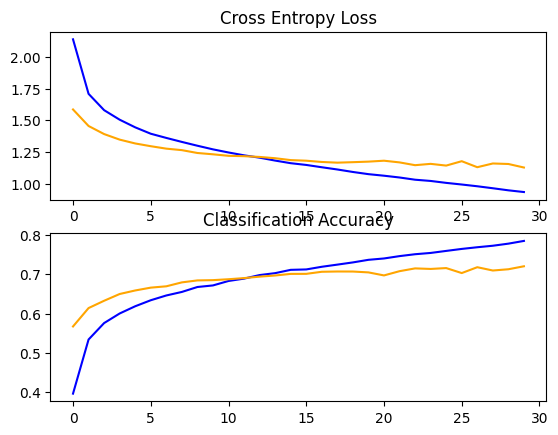

In [30]:
# Preprocess data
trainX, trainy, testX, testy = load_and_preprocess_data()

# Define VGG model
vgg_model_v2 = define_vgg_model_v2()

# Show model summary
vgg_model_v2.summary()

# Train model
vgg_model_v2_history = vgg_model_v2.fit(trainX, trainy, epochs=30, validation_data=(testX, testy), batch_size=64)

# Evaluate model
vgg_model_v2_test_loss, vgg_model_v2_test_acc = vgg_model_v2.evaluate(testX, testy, verbose=0)
print(f"Achieved accuracy on test dataset: {vgg_model_v2_test_acc * 100.0}%")

# Plot accuracy and loss
summarize_diagnostics(vgg_model_v2_history)

###Transfer learning using VGG16 and fine-tuning last three layers - accuracy on test dataset: ~ 71% - 73%

### Transfer learning using only first 3 blocks of VGG16 and fine-tuning only third block

In [10]:
from keras import layers, models, Model
from keras.applications import VGG16
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.models import Sequential



def define_vgg_model_v3():

  # Load the VGG16 model and take only up to block3
  vgg_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
  block3_output = vgg_base_model.get_layer('block3_pool').output
  block3_model = Model(inputs=vgg_base_model.input, outputs=block3_output)


  # Freeze all layers up to block3, unfreeze block3 for fine-tuning
  for layer in block3_model.layers:
    if 'block3' in layer.name:
      layer.trainable = True
    else:
      layer.trainable = False

  # Build TF model
  model = Sequential()

  # Add block3 model
  model.add(block3_model)

  # Add custom layers on top of VGG16 base model
  model.add(layers.Flatten())
  model.add(layers.Dense(256, kernel_regularizer=l2(0.001))) # Dense layer with L2 regularization
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))

  # Compile model
  opt = SGD(learning_rate=0.0001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional_19 (Functional)           │ (None, 4, 4, 256)           │       1,735,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,787,914 (10.64 MB)

 Trainable params: 2,527,242 (9.64 MB)

 Non-trainable params: 260,672 (1018.25 KB)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.2805 - loss: 2.6585 - val_accuracy: 0.6128 - val_loss: 1.6321
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5462 - loss: 1.8088 - val_accuracy: 0.6639 - val_loss: 1.4634
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6053 - loss: 1.6335 - val_accuracy: 0.6900 - val_loss: 1.3861
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6358 - loss: 1.5321 - val_accuracy: 0.7079 - val_loss: 1.3331
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6608 - loss: 1.4664 - val_accuracy: 0.7190 - val_loss: 1.2959
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6785 - loss: 1.4122 - val_accuracy: 0.7282 - val_loss: 1.2650
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6908 - loss: 1.3746 - val_accuracy: 0.7331 - val_loss: 1.2391
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7031 - loss: 1.3362 - val_

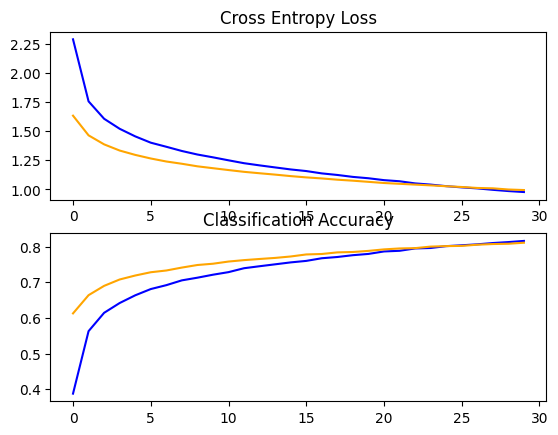

In [11]:
# Preprocess data
trainX, trainy, testX, testy = load_and_preprocess_data()

# Data augmentation on training dataset
# perform_data_augmentation(trainX)

# Define base model with batch normalization (momentum=0.8)
vgg_model_v3 = define_vgg_model_v3()

# Show model summary
vgg_model_v3.summary()

# Train model
vgg_model_v3_history = vgg_model_v3.fit(trainX, trainy, epochs=30, validation_data=(testX, testy), batch_size=64)

# Evaluate model
vgg_model_v3_test_loss, vgg_model_v3_test_acc = vgg_model_v3.evaluate(testX, testy, verbose=0)
print(f"Achieved accuracy on test dataset: {vgg_model_v3_test_acc * 100.0}%")

# Plot accuracy and loss
summarize_diagnostics(vgg_model_v3_history)

###Transfer learning using only first 3 blocks of VGG16 and fine-tuning only third block - accuracy on test dataset: ~ 80% - 81%

###Transfer learning using only first 3 blocks of VGG16 and fine-tuning last 2 blocks

In [15]:
from keras import layers, models, Model
from keras.applications import VGG16
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.models import Sequential



def define_vgg_model_v4():

  # Load the VGG16 model and take only up to block3
  vgg_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
  block3_output = vgg_base_model.get_layer('block3_pool').output
  block3_model = Model(inputs=vgg_base_model.input, outputs=block3_output)


  # Freeze all layers up to block3, unfreeze block3 for fine-tuning
  for layer in block3_model.layers:
    if 'block2' in layer.name or 'block3' in layer.name:
      layer.trainable = True
    else:
      layer.trainable = False

  # Build TF model
  model = Sequential()

  # Add block3 model
  model.add(block3_model)

  # Add custom layers on top of VGG16 base model
  model.add(layers.Flatten()) # Global pooling to reduce dimensions
  model.add(layers.Dense(256, kernel_regularizer=l2(0.001))) # Dense layer with L2 regularization
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))

  # Compile model
  opt = SGD(learning_rate=0.0001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional_47 (Functional)           │ (None, 4, 4, 256)           │       1,735,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,787,914 (10.64 MB)

 Trainable params: 2,748,682 (10.49 MB)

 Non-trainable params: 39,232 (153.25 KB)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.2652 - loss: 2.7791 - val_accuracy: 0.6071 - val_loss: 1.6407
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.5442 - loss: 1.8203 - val_accuracy: 0.6628 - val_loss: 1.4758
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.5969 - loss: 1.6481 - val_accuracy: 0.6900 - val_loss: 1.3891
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6364 - loss: 1.5397 - val_accuracy: 0.7072 - val_loss: 1.3363
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6606 - loss: 1.4619 - val_accuracy: 0.7204 - val_loss: 1.2944
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.6745 - loss: 1.4151 - val_accuracy: 0.7309 - val_loss: 1.2582
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6918 - loss: 1.3713 - val_accuracy: 0.7427 - val_loss: 1.2354
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.7066 - loss: 1.3286 - 

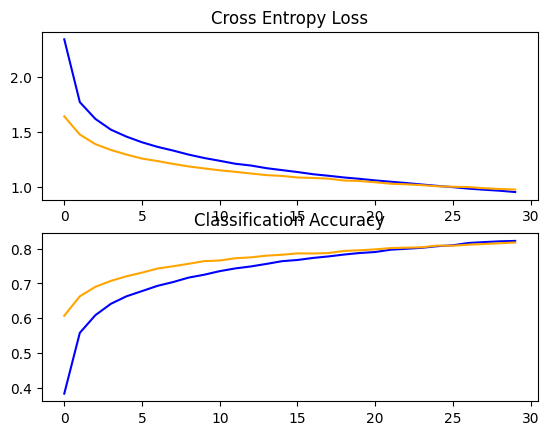

In [17]:
# Preprocess data
trainX, trainy, testX, testy = load_and_preprocess_data()

# Define VGG model
vgg_model_v4 = define_vgg_model_v4()

# Show model summary
vgg_model_v4.summary()

# Train model
vgg_model_v4_history = vgg_model_v4.fit(trainX, trainy, epochs=30, validation_data=(testX, testy), batch_size=64)

# Evaluate model
vgg_model_v4_test_loss, vgg_model_v4_test_acc = vgg_model_v4.evaluate(testX, testy, verbose=0)
print(f"Achieved accuracy on test dataset: {vgg_model_v4_test_acc * 100.0}%")

# Plot accuracy and loss
summarize_diagnostics(vgg_model_v4_history)

###Transfer learning using only first 3 blocks of VGG16 and fine-tuning last 2 blocks - accuracy on test dataset: ~ 81% - 83%